<a href="https://colab.research.google.com/github/kd303/tensorflow_coursera/blob/master/time_series/S%2BP_Week_3_Exercise_Question.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.0.0-rc0


     |████████████████████████████████| 380.5MB 74kB/s 
     |████████████████████████████████| 501kB 34.0MB/s 
     |████████████████████████████████| 4.3MB 30.0MB/s 


In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.0.0-rc0


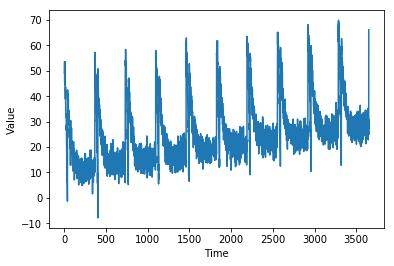

In [0]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(False)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.1,
                    np.cos(season_time * 6 * np.pi),
                    2 / np.exp(9 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(10 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.005
noise_level = 3

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=51)

split_time = 3000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

plot_series(time, series)

In [0]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
  dataset = tf.data.Dataset.from_tensor_slices(series)
  dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
  dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
  dataset = dataset.shuffle(shuffle_buffer).map(lambda window: (window[:-1], window[-1]))
  dataset = dataset.batch(batch_size).prefetch(1)
  return dataset

In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()

print(x_train.shape)


window_size = 30
batch_size = 64
shuffle_buffer_size = 1000

(3000,)


In [0]:
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
print(dataset)

<PrefetchDataset shapes: ((None, None), (None,)), types: (tf.float32, tf.float32)>


In [0]:



model = tf.keras.models.Sequential([
  tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  # YOUR CODE HERE
  tf.keras.layers.LSTM(40, return_sequences=True),
  tf.keras.layers.LSTM(40),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
5/5 [==============================] - 5s 969ms/step - loss: 64.9000 - mae: 65.4000
Epoch 2/100
5/5 [==============================] - 2s 367ms/step - loss: 64.3999 - mae: 65.3570
Epoch 3/100
5/5 [==============================] - 2s 355ms/step - loss: 64.2727 - mae: 65.2825
Epoch 4/100
5/5 [==============================] - 2s 370ms/step - loss: 64.2534 - mae: 65.1835
Epoch 5/100
5/5 [==============================] - 2s 359ms/step - loss: 64.1237 - mae: 65.0632
Epoch 6/100
5/5 [==============================] - 2s 393ms/step - loss: 63.9590 - mae: 64.9226
Epoch 7/100
5/5 [==============================] - 2s 382ms/step - loss: 63.7338 - mae: 64.7617
Epoch 8/100
5/5 [==============================] - 2s 386ms/step - loss: 63.6699 - mae: 64.5792
Epoch 9/100
5/5 [==============================] - 2s 378ms/step - loss: 63.6096 - mae: 64.3731
Epoch 10/100
5/5 [==============================] - 2s 373ms/step - loss: 63.0976 - mae: 64.1408
Epoch 11/100
5/5 [=====================

[1e-06, 0.0001, 1, 20]

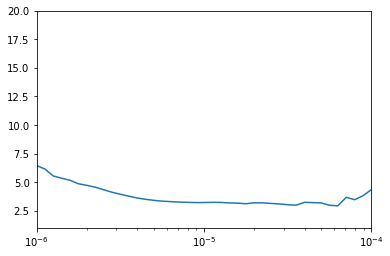

In [0]:
x_axis = history.history["lr"]
y_axis = history.history["loss"]
plt.semilogx(x_axis, y_axis)
plt.axis([1e-6, 1e-4, 1, 20])

# FROM THIS PICK A LEARNING RATE

In [0]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

tf.keras.backend.clear_session()
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
   tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  # YOUR CODE HERE
  tf.keras.layers.LSTM(50, return_sequences=True),
  tf.keras.layers.LSTM(50),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 100.0)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(lr=0.4*1e-5),metrics=["mae"])
history = model.fit(dataset,epochs=500,verbose=1)
                                                            
# FIND A MODEL AND A LR THAT TRAINS TO AN MAE < 3                                                          

Epoch 1/500
47/47 [==============================] - 5s 98ms/step - loss: 4632.6231 - mae: 66.5062
Epoch 2/500
47/47 [==============================] - 1s 25ms/step - loss: 3990.4538 - mae: 61.5137
Epoch 3/500
47/47 [==============================] - 1s 25ms/step - loss: 3441.7345 - mae: 56.7730
Epoch 4/500
47/47 [==============================] - 1s 25ms/step - loss: 2959.3068 - mae: 52.2779
Epoch 5/500
47/47 [==============================] - 1s 25ms/step - loss: 2528.1118 - mae: 47.9869
Epoch 6/500
47/47 [==============================] - 1s 27ms/step - loss: 2162.2277 - mae: 43.9030
Epoch 7/500
47/47 [==============================] - 1s 28ms/step - loss: 1835.3335 - mae: 39.9978
Epoch 8/500
47/47 [==============================] - 1s 27ms/step - loss: 1557.3217 - mae: 36.2893
Epoch 9/500
47/47 [==============================] - 1s 28ms/step - loss: 1315.1924 - mae: 32.7687
Epoch 10/500
47/47 [==============================] - 1s 27ms/step - loss: 1105.4118 - mae: 29.4222
Epoch 11/

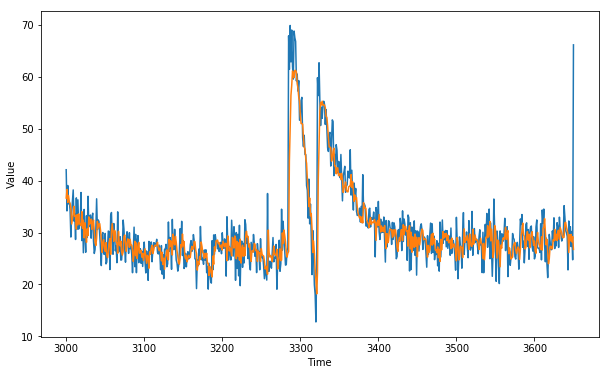

In [0]:
forecast = []
results = []
for time in range(len(series) - window_size):
  forecast.append(model.predict(series[time:time + window_size][np.newaxis]))

forecast = forecast[split_time-window_size:]
results = np.array(forecast)[:, 0, 0]


plt.figure(figsize=(10, 6))

plot_series(time_valid, x_valid)
plot_series(time_valid, results)

In [0]:
tf.keras.metrics.mean_absolute_error(x_valid, results).numpy()

# YOUR RESULT HERE SHOULD BE LESS THAN 4


3.107788

<Figure size 432x288 with 0 Axes>

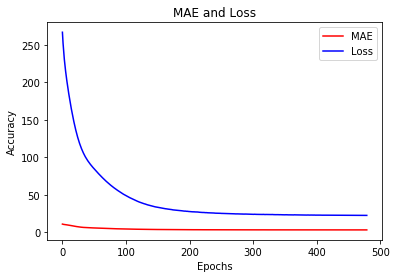

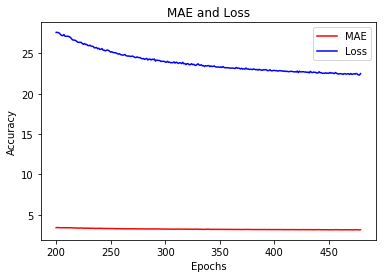

<Figure size 432x288 with 0 Axes>

In [0]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae'][20:]
loss=history.history['loss'][20:]

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()